In [1]:
import pandas as pd

df = pd.read_csv('data/고용 산재 보험.csv', encoding='utf-8-sig')

In [27]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "레고 피보 프리랜서분 정답 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


['레고', '피보', '프리랜서분', '정답', '은', '이', '것', '등', '더', '를']

In [28]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=pMu-3hqwURw,신성호,5개월 전,이직확인서알아보기접수했다는데4월29일12시경에 팩스로보냈다는데아직해결이안되실업금액이...
1,1,https://www.youtube.com//watch?v=pMu-3hqwURw,짱짱걸문수,5개월 전,어렵네
2,2,https://www.youtube.com//watch?v=7E7NRS2rKS0,a sk,1주 전,휴업 또는 휴직처리는 어떤식으로 되나요??
3,3,https://www.youtube.com//watch?v=7E7NRS2rKS0,불타오르네.,1주 전,대행기사등록할때 산재가입을할것이냐 질문도안하고 그런게있는지도 몰라서 가입을안하고 사...
4,4,https://www.youtube.com//watch?v=55FsD59tzBM,아빠는노무사TV,4개월 전,궁금한 점이 많았는데 도움이 많이 되었습니다.감사합니다.
...,...,...,...,...,...
561,561,https://www.youtube.com//watch?v=gXFNNrUIaxg,쿨케이,3주 전,그러니까 월급에서 9프로 낸다고 생각하면 되는거죠? 간단히 얘기해서???
562,562,https://www.youtube.com//watch?v=dA_GbdkRsag,고은주,4개월 전,교수님께서 직접 피피티 자료로 설명해주셔서 제가 정리하기에 좀 더 수월하네요ㅎ..!...
563,563,https://www.youtube.com//watch?v=dA_GbdkRsag,이예진,4개월 전,"산재보험에 대해 궁금한 점이 있다고 지난 강의 댓글을 달았는데, 교수님께서 알려주신..."
564,564,https://www.youtube.com//watch?v=dA_GbdkRsag,고애심TV,5개월 전,우리나라 산업재해보험법과 근로복지공단 홈페이지 활용도움.산재보험- 우리나라 사회보...


In [29]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'회사': 90,
 '산재보험': 86,
 '프리랜서': 82,
 '영상': 73,
 '특고': 61,
 '산재': 60,
 '코로나': 53,
 '이직확인서': 53,
 '정보': 49,
 '안녕': 42,
 '시간': 39,
 '혜택': 34,
 '실업급여': 33,
 '신청': 32,
 '산재처리': 30,
 '직장': 29,
 '병원': 27,
 '근로자': 27,
 '고용보험': 26,
 '보상': 25,
 '도움': 24,
 '처리': 24,
 '단위기간': 22,
 '정도': 21,
 '근무': 19,
 '이상': 18,
 '월급': 18,
 '시기': 18,
 '가입': 17,
 '감사': 17,
 '본인': 17,
 '필요': 17,
 '이번': 17,
 '방법': 17,
 '지금': 16,
 '구독': 16,
 '근로복지공단': 16,
 '오늘': 16,
 '내용': 15,
 '상황': 15,
 '상태': 15,
 '사업장': 15,
 '사업자': 15,
 '조금': 15,
 '퇴사': 15,
 '산재신청': 14,
 '보험': 14,
 '하루': 14,
 '신고': 13,
 '일용직': 13}

In [30]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'회사': 90,
 '산재보험': 86,
 '프리랜서': 82,
 '영상': 73,
 '특고': 61,
 '산재': 60,
 '코로나': 53,
 '이직확인서': 53,
 '정보': 49,
 '안녕': 42,
 '시간': 39,
 '혜택': 34,
 '실업급여': 33,
 '신청': 32,
 '산재처리': 30,
 '직장': 29,
 '병원': 27,
 '근로자': 27,
 '고용보험': 26,
 '보상': 25,
 '도움': 24,
 '처리': 24,
 '단위기간': 22,
 '정도': 21,
 '근무': 19,
 '이상': 18,
 '월급': 18,
 '시기': 18,
 '가입': 17,
 '감사': 17}

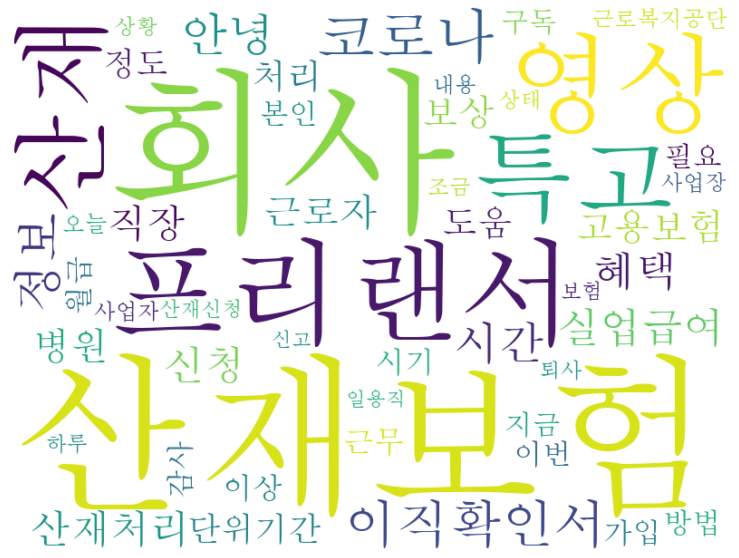

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

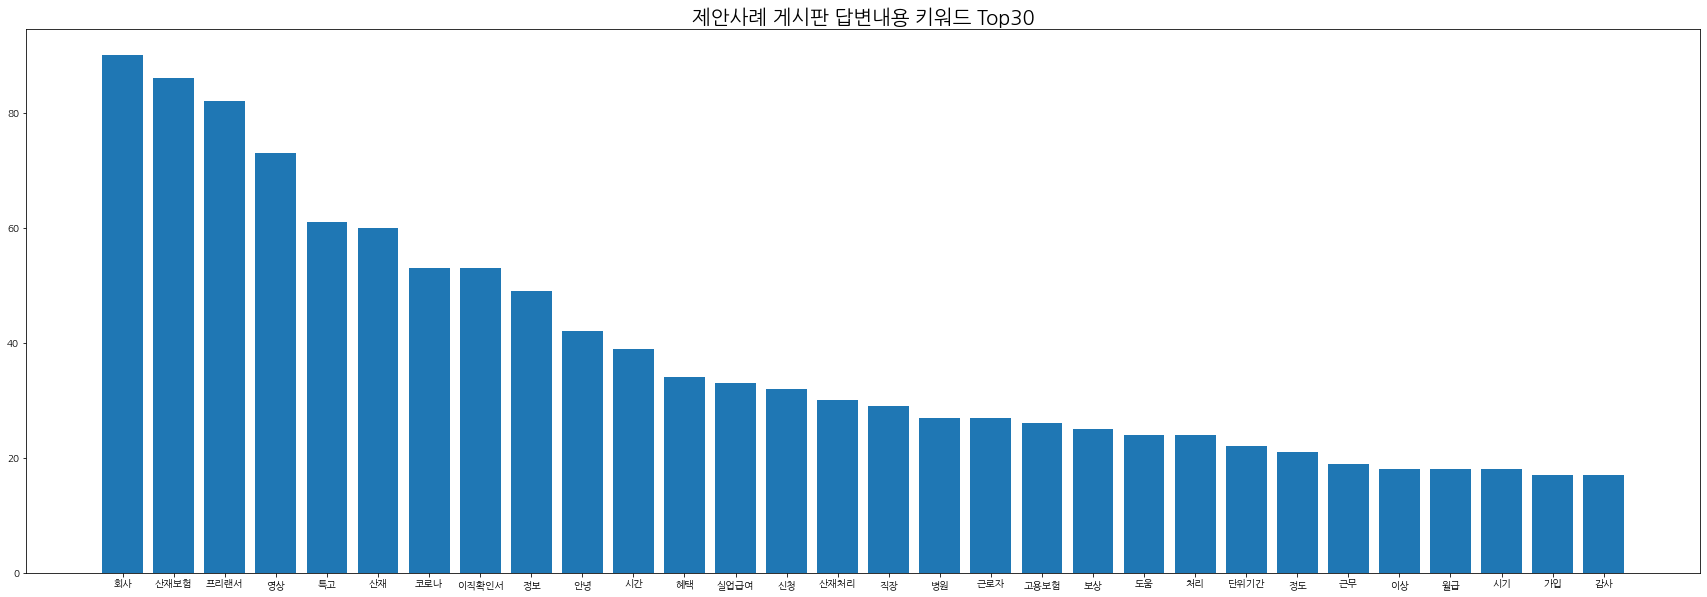

In [32]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [33]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'회사': 0,
 '산재보험': 1,
 '프리랜서': 2,
 '영상': 3,
 '특고': 4,
 '산재': 5,
 '코로나': 6,
 '이직확인서': 7,
 '정보': 8,
 '안녕': 9,
 '시간': 10,
 '혜택': 11,
 '실업급여': 12,
 '신청': 13,
 '산재처리': 14,
 '직장': 15,
 '병원': 16,
 '근로자': 17,
 '고용보험': 18,
 '보상': 19,
 '도움': 20,
 '처리': 21,
 '단위기간': 22,
 '정도': 23,
 '근무': 24,
 '이상': 25,
 '월급': 26,
 '시기': 27,
 '가입': 28,
 '감사': 29,
 '본인': 30,
 '필요': 31,
 '이번': 32,
 '방법': 33,
 '지금': 34,
 '구독': 35,
 '근로복지공단': 36,
 '오늘': 37,
 '내용': 38,
 '상황': 39,
 '상태': 40,
 '사업장': 41,
 '사업자': 42,
 '조금': 43,
 '퇴사': 44,
 '산재신청': 45,
 '보험': 46,
 '하루': 47,
 '신고': 48,
 '일용직': 49}

In [34]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재보험': 1,
 '프리랜서': 2,
 '영상': 3,
 '특고': 4,
 '산재': 5,
 '코로나': 6,
 '이직확인서': 7,
 '정보': 8,
 '안녕': 9,
 '시간': 10,
 '혜택': 11,
 '실업급여': 12,
 '신청': 13,
 '산재처리': 14,
 '직장': 15,
 '병원': 16,
 '근로자': 17,
 '고용보험': 18,
 '보상': 19,
 '도움': 20,
 '처리': 21,
 '단위기간': 22,
 '정도': 23,
 '근무': 24,
 '이상': 25,
 '월급': 26,
 '시기': 27,
 '가입': 28,
 '감사': 29}

In [35]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재보험': 1,
 '프리랜서': 2,
 '영상': 3,
 '특고': 4,
 '산재': 5,
 '코로나': 6,
 '이직확인서': 7,
 '정보': 8,
 '안녕': 9,
 '시간': 10,
 '혜택': 11,
 '실업급여': 12,
 '신청': 13,
 '산재처리': 14,
 '직장': 15,
 '병원': 16,
 '근로자': 17,
 '고용보험': 18,
 '보상': 19,
 '도움': 20,
 '처리': 21,
 '단위기간': 22,
 '정도': 23,
 '근무': 24,
 '이상': 25,
 '월급': 26,
 '시기': 27,
 '가입': 28,
 '감사': 29}

In [36]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '회사',
 1: '산재보험',
 2: '프리랜서',
 3: '영상',
 4: '특고',
 5: '산재',
 6: '코로나',
 7: '이직확인서',
 8: '정보',
 9: '안녕',
 10: '시간',
 11: '혜택',
 12: '실업급여',
 13: '신청',
 14: '산재처리',
 15: '직장',
 16: '병원',
 17: '근로자',
 18: '고용보험',
 19: '보상',
 20: '도움',
 21: '처리',
 22: '단위기간',
 23: '정도',
 24: '근무',
 25: '이상',
 26: '월급',
 27: '시기',
 28: '가입',
 29: '감사',
 30: '본인',
 31: '필요',
 32: '이번',
 33: '방법',
 34: '지금',
 35: '구독',
 36: '근로복지공단',
 37: '오늘',
 38: '내용',
 39: '상황',
 40: '상태',
 41: '사업장',
 42: '사업자',
 43: '조금',
 44: '퇴사',
 45: '산재신청',
 46: '보험',
 47: '하루',
 48: '신고',
 49: '일용직'}

In [37]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '회사',
 1: '산재보험',
 2: '프리랜서',
 3: '영상',
 4: '특고',
 5: '산재',
 6: '코로나',
 7: '이직확인서',
 8: '정보',
 9: '안녕',
 10: '시간',
 11: '혜택',
 12: '실업급여',
 13: '신청',
 14: '산재처리',
 15: '직장',
 16: '병원',
 17: '근로자',
 18: '고용보험',
 19: '보상',
 20: '도움',
 21: '처리',
 22: '단위기간',
 23: '정도',
 24: '근무',
 25: '이상',
 26: '월급',
 27: '시기',
 28: '가입',
 29: '감사'}

In [38]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0,  4,  2, ...,  1,  3,  1],
       [ 4,  0, 18, ...,  0,  0,  1],
       [ 2, 18,  0, ...,  1,  0,  0],
       ...,
       [ 1,  0,  1, ...,  0,  0,  1],
       [ 3,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  0, ...,  1,  0,  0]])

In [39]:
answer_sentences_nouns_result

[['이직', '접수', '팩스로보', '금액', '해결안', '문의'],
 [],
 ['휴업', '휴직처리'],
 [],
 [],
 ['대행', '산재', '질문도안', '가입', '사고가'],
 ['산재적용'],
 [],
 ['도움'],
 [],
 [],
 ['미승', '급일경', '원가계산', '용산재', '산정', '계약'],
 [],
 ['설명', '내용'],
 [],
 ['댓글', '기가'],
 [],
 [],
 [],
 [],
 [],
 ['이해'],
 ['공사', '면허', '작년', '노임', '공사원가', '노임', '일괄', '신고'],
 [],
 ['근로자분', '사업주', '모두', '도움', '내용'],
 [],
 ['산재지식', '영상', '부분'],
 ['도움'],
 ['감사'],
 [],
 ['사업자관리번호'],
 ['조회', '도안'],
 ['병원', '족저근', '발바닥', '앞쪽', '뒷꿈치', '발바닥', '중간', '앞쪽'],
 ['선생', '일반', '회사', '산재', '회사원', '경위조사', '누구'],
 [],
 ['요양보호',
  '종사자',
  '계단',
  '손목골절',
  '서산',
  '인정',
  '휴직',
  '고입',
  '손목',
  '생각',
  '회복',
  '산재신청',
  '승인',
  '지금',
  '요양치료',
  '벌금부',
  '이유',
  '산재',
  '병원치료',
  '서산',
  '직장',
  '복귀',
  '생각',
  '고민',
  '산재신청',
  '벌금'],
 [],
 [],
 ['구독'],
 [],
 ['설정', '보상멘토'],
 ['카페', '운영', '보상정보'],
 ['NAVER'],
 ['온라인'],
 [],
 ['안녕', '얼마전', '오토바이'],
 ['보행자', '횡단보도초록불'],
 [],
 ['책임보험', '보험사', '이야기', '가해자', '합의', '보상비', '얼마정도', '연락', '사고', '경찰조사', '합의'],
 ['전치', '합의',

In [40]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0,  4,  2,  2,  1, 12,  0,  9,  1,  4,  2,  0,  5,  6,  4,  1,
         5,  4,  4,  2,  1,  6,  1,  1,  3,  2,  1,  0,  2,  0],
       [ 4,  0, 18,  6, 12,  2, 13,  0,  3,  0,  3, 16,  0,  1,  1,  0,
         1,  1,  3,  3,  3,  2,  0,  1,  0,  0,  1,  2,  7,  0],
       [ 2, 18,  0,  5, 40,  0, 23,  0,  3,  0,  5, 13,  0,  2,  0,  0,
         0,  1,  0,  3,  1,  0,  0,  0,  0,  0,  1,  6,  1,  0],
       [ 2,  6,  5,  0,  5,  2,  4,  3,  3,  6,  0,  4,  3,  0,  1,  1,
         0,  1,  0,  1,  7,  1,  2,  2,  0,  1,  0,  1,  0,  5],
       [ 1, 12, 40,  5,  0,  1, 21,  0,  3,  0,  6, 11,  0,  2,  1,  0,
         0,  1,  0,  2,  1,  0,  0,  0,  0,  0,  0,  7,  3,  0],
       [12,  2,  0,  2,  1,  0,  0,  0,  2,  1,  1,  1,  0,  6,  3,  3,
         4,  3,  3,  4,  1,  4,  0,  2,  1,  0,  0,  1,  2,  1],
       [ 0, 13, 23,  4, 21,  0,  0,  0,  2,  0,  4,  3,  0,  1,  0,  0,
         0,  0,  1,  3,  0,  0,  0,  0,  0,  1,  0,  8,  3,  0],
       [ 9,  0,  0,  3,  0,  0,  0,  0,  

In [41]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [42]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 4},
   2: {'weight': 2},
   3: {'weight': 2},
   4: {'weight': 1},
   5: {'weight': 12},
   7: {'weight': 9},
   8: {'weight': 1},
   9: {'weight': 4},
   10: {'weight': 2},
   12: {'weight': 5},
   13: {'weight': 6},
   14: {'weight': 4},
   15: {'weight': 1},
   16: {'weight': 5},
   17: {'weight': 4},
   18: {'weight': 4},
   19: {'weight': 2},
   20: {'weight': 1},
   21: {'weight': 6},
   22: {'weight': 1},
   23: {'weight': 1},
   24: {'weight': 3},
   25: {'weight': 2},
   26: {'weight': 1},
   28: {'weight': 2}}),
 (1,
  {0: {'weight': 4},
   2: {'weight': 18},
   3: {'weight': 6},
   4: {'weight': 12},
   5: {'weight': 2},
   6: {'weight': 13},
   8: {'weight': 3},
   10: {'weight': 3},
   11: {'weight': 16},
   13: {'weight': 1},
   14: {'weight': 1},
   16: {'weight': 1},
   17: {'weight': 1},
   18: {'weight': 3},
   19: {'weight': 3},
   20: {'weight': 3},
   21: {'weight': 2},
   23: {'weight': 1},
   26: {'weight': 1},
   27: {'weight': 2},
   28: {

In [43]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 4},
   2: {'weight': 2},
   3: {'weight': 2},
   4: {'weight': 1},
   5: {'weight': 12},
   7: {'weight': 9},
   8: {'weight': 1},
   9: {'weight': 4},
   10: {'weight': 2},
   12: {'weight': 5},
   13: {'weight': 6},
   14: {'weight': 4},
   15: {'weight': 1},
   16: {'weight': 5},
   17: {'weight': 4},
   18: {'weight': 4},
   19: {'weight': 2},
   20: {'weight': 1},
   21: {'weight': 6},
   22: {'weight': 1},
   23: {'weight': 1},
   24: {'weight': 3},
   25: {'weight': 2},
   26: {'weight': 1},
   28: {'weight': 2},
   30: {'weight': 2},
   31: {'weight': 3},
   32: {'weight': 3},
   33: {'weight': 1},
   34: {'weight': 2},
   36: {'weight': 3},
   39: {'weight': 3},
   40: {'weight': 2},
   41: {'weight': 1},
   42: {'weight': 2},
   44: {'weight': 2},
   45: {'weight': 5},
   46: {'weight': 1},
   47: {'weight': 1},
   48: {'weight': 3},
   49: {'weight': 1}}),
 (1,
  {0: {'weight': 4},
   2: {'weight': 18},
   3: {'weight': 6},
   4: {'weight': 12},
   5: {

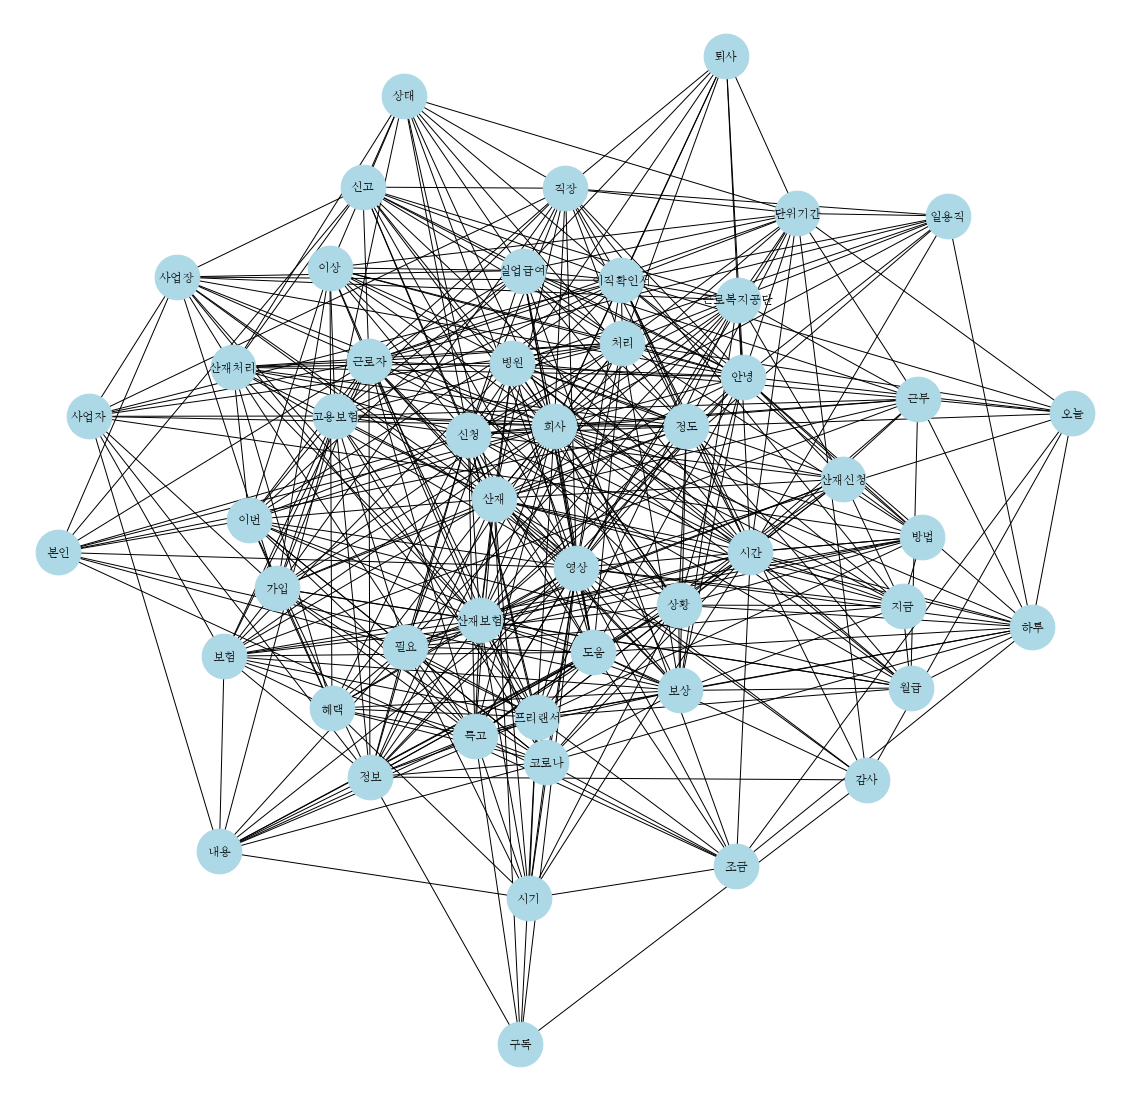

In [44]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

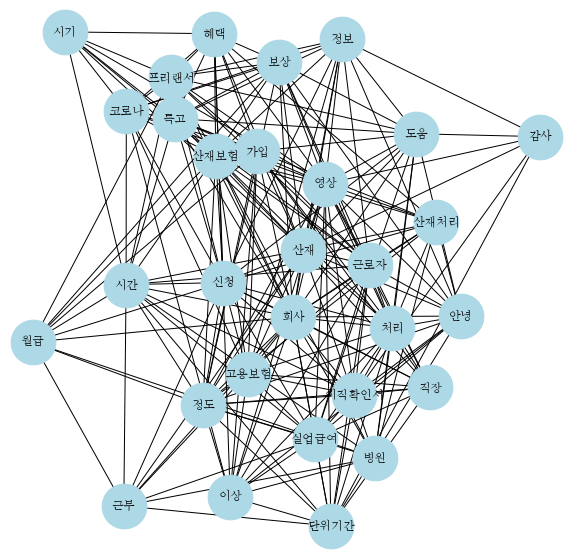

In [45]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [46]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.550561797752809,
 1: 0.5568181818181818,
 2: 0.5212765957446809,
 3: 0.5975609756097561,
 4: 0.5268817204301075,
 5: 0.5384615384615384,
 6: 0.4375,
 7: 0.49,
 8: 0.5444444444444444,
 9: 0.5833333333333334,
 10: 0.5833333333333334,
 11: 0.47572815533980584,
 12: 0.5051546391752577,
 13: 0.5975609756097561,
 14: 0.5384615384615384,
 15: 0.5384615384615384,
 16: 0.5568181818181818,
 17: 0.6282051282051282,
 18: 0.5568181818181818,
 19: 0.5632183908045977,
 20: 0.5632183908045977,
 21: 0.5697674418604651,
 22: 0.5104166666666666,
 23: 0.5975609756097561,
 24: 0.532608695652174,
 25: 0.5568181818181818,
 26: 0.5268817204301075,
 27: 0.5,
 28: 0.5384615384615384,
 29: 0.4224137931034483,
 30: 0.5444444444444444,
 31: 0.5384615384615384,
 32: 0.550561797752809,
 33: 0.5697674418604651,
 34: 0.532608695652174,
 35: 0.45794392523364486,
 36: 0.5051546391752577,
 37: 0.49,
 38: 0.49,
 39: 0.5697674418604651,
 40: 0.5212765957446809,
 41: 0.550561797752809,
 42: 0.5212765957446809,
 43: 0.

In [47]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.5178571428571429,
 1: 0.5471698113207547,
 2: 0.47540983606557374,
 3: 0.5370370370370371,
 4: 0.5272727272727272,
 5: 0.5370370370370371,
 6: 0.43283582089552236,
 7: 0.4603174603174603,
 8: 0.5178571428571429,
 9: 0.5686274509803921,
 10: 0.5576923076923077,
 11: 0.48333333333333334,
 12: 0.4461538461538462,
 13: 0.6041666666666666,
 14: 0.5686274509803921,
 15: 0.5,
 16: 0.5272727272727272,
 17: 0.6590909090909091,
 18: 0.5576923076923077,
 19: 0.5370370370370371,
 20: 0.5576923076923077,
 21: 0.5471698113207547,
 22: 0.5,
 23: 0.6304347826086957,
 24: 0.48333333333333334,
 25: 0.58,
 26: 0.5178571428571429,
 27: 0.43283582089552236,
 28: 0.5576923076923077,
 29: 0.42028985507246375}

# 연결중심성

In [48]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.836734693877551,
 1: 0.5918367346938775,
 2: 0.5102040816326531,
 3: 0.6938775510204082,
 4: 0.4897959183673469,
 5: 0.673469387755102,
 6: 0.3877551020408163,
 7: 0.4693877551020408,
 8: 0.4081632653061224,
 9: 0.4693877551020408,
 10: 0.5102040816326531,
 11: 0.3061224489795918,
 12: 0.42857142857142855,
 13: 0.5510204081632653,
 14: 0.32653061224489793,
 15: 0.3877551020408163,
 16: 0.3469387755102041,
 17: 0.5306122448979591,
 18: 0.42857142857142855,
 19: 0.4081632653061224,
 20: 0.4081632653061224,
 21: 0.4897959183673469,
 22: 0.36734693877551017,
 23: 0.4693877551020408,
 24: 0.2857142857142857,
 25: 0.32653061224489793,
 26: 0.26530612244897955,
 27: 0.24489795918367346,
 28: 0.3469387755102041,
 29: 0.16326530612244897,
 30: 0.22448979591836732,
 31: 0.4081632653061224,
 32: 0.3877551020408163,
 33: 0.2857142857142857,
 34: 0.26530612244897955,
 35: 0.12244897959183673,
 36: 0.3061224489795918,
 37: 0.2040816326530612,
 38: 0.24489795918367346,
 39: 0.3469387755102041,


In [49]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.8620689655172413,
 1: 0.7241379310344828,
 2: 0.5172413793103449,
 3: 0.7586206896551724,
 4: 0.5517241379310345,
 5: 0.7586206896551724,
 6: 0.4482758620689655,
 7: 0.4482758620689655,
 8: 0.4482758620689655,
 9: 0.48275862068965514,
 10: 0.5517241379310345,
 11: 0.41379310344827586,
 12: 0.5172413793103449,
 13: 0.6551724137931034,
 14: 0.41379310344827586,
 15: 0.41379310344827586,
 16: 0.3793103448275862,
 17: 0.6551724137931034,
 18: 0.5172413793103449,
 19: 0.48275862068965514,
 20: 0.48275862068965514,
 21: 0.6206896551724138,
 22: 0.4482758620689655,
 23: 0.6206896551724138,
 24: 0.3103448275862069,
 25: 0.4482758620689655,
 26: 0.3448275862068966,
 27: 0.27586206896551724,
 28: 0.48275862068965514,
 29: 0.20689655172413793}

# 위세중심성

In [50]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.0946557054122345,
 1: 0.3548332107827308,
 2: 0.5263280327680054,
 3: 0.1482925185534223,
 4: 0.5001646248294043,
 5: 0.06840484182893775,
 6: 0.38944640924669793,
 7: 0.038674514776229754,
 8: 0.07876774363049545,
 9: 0.028953298591710922,
 10: 0.11847067900328068,
 11: 0.2549333128948644,
 12: 0.029103622346218667,
 13: 0.06350938531438892,
 14: 0.030880427089561742,
 15: 0.01618790792127875,
 16: 0.02195749848010842,
 17: 0.036961483595187694,
 18: 0.03838409266012978,
 19: 0.0772153733301306,
 20: 0.05161532671416743,
 21: 0.033489922861358705,
 22: 0.014754470647992747,
 23: 0.020204786392230382,
 24: 0.016615634208353824,
 25: 0.01823193083919203,
 26: 0.02010489770594383,
 27: 0.1405134532464288,
 28: 0.083260966550798,
 29: 0.014484026829186447,
 30: 0.009418934660192814,
 31: 0.09510448280023824,
 32: 0.042337108349571106,
 33: 0.01962331539210174,
 34: 0.01275316560804754,
 35: 0.041734850360647814,
 36: 0.030117367118578757,
 37: 0.010488075214155146,
 38: 0.0384536847

In [51]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.07993035988877517,
 1: 0.36042869195450866,
 2: 0.5356343090270114,
 3: 0.1468602303508209,
 4: 0.5093255428976811,
 5: 0.0584756631586699,
 6: 0.3963604715087671,
 7: 0.031052900113285212,
 8: 0.07464369936905307,
 9: 0.024517957442669013,
 10: 0.11629191239616161,
 11: 0.26189359973773335,
 12: 0.024598444595012307,
 13: 0.057796382616940936,
 14: 0.028644948634346235,
 15: 0.013192989364038312,
 16: 0.017681300381784403,
 17: 0.033847165221710794,
 18: 0.03335544448076462,
 19: 0.07736323416693912,
 20: 0.04799336514991319,
 21: 0.030474783017106117,
 22: 0.012734288515714976,
 23: 0.01856992022103528,
 24: 0.013739071078850027,
 25: 0.016911726116815167,
 26: 0.019055299379000554,
 27: 0.14338982508356354,
 28: 0.08501666181304862,
 29: 0.013642714806441136}

# 근접중심성

In [52]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.22932190443865888,
 1: 0.2049841291407563,
 2: 0.1934561692573297,
 3: 0.21683492136914995,
 4: 0.19022548486696825,
 5: 0.2147738658561155,
 6: 0.17189634505999146,
 7: 0.18678150878624866,
 8: 0.1761866864358541,
 9: 0.1873141973696266,
 10: 0.19396110294195149,
 11: 0.15337744108213125,
 12: 0.1799748287300457,
 13: 0.1998263593945709,
 14: 0.15901827742173863,
 15: 0.17189179571392058,
 16: 0.16344116278796253,
 17: 0.19690958913007092,
 18: 0.180337027604643,
 19: 0.17676256693358094,
 20: 0.17682391167159403,
 21: 0.1906002815294397,
 22: 0.1671355328311423,
 23: 0.18752345748589244,
 24: 0.1481814195783077,
 25: 0.15890702247200003,
 26: 0.14230152639522864,
 27: 0.13548099086263565,
 28: 0.16366069190877547,
 29: 0.10468474110834268,
 30: 0.1295902075970648,
 31: 0.1759925584055967,
 32: 0.17265752813066906,
 33: 0.1484176744314603,
 34: 0.14211810196138708,
 35: 0.08611866521892292,
 36: 0.15401727285395392,
 37: 0.12129056613702541,
 38: 0.13535326658537056,
 39: 0.1635

In [53]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.30104749721325313,
 1: 0.2810968588761676,
 2: 0.24136084555295897,
 3: 0.2869160735708003,
 4: 0.2489971984429315,
 5: 0.28745276624979677,
 6: 0.22458750787555867,
 7: 0.2246712988145572,
 8: 0.22568746039877416,
 9: 0.23405074959540476,
 10: 0.25019663249440527,
 11: 0.21504284702357623,
 12: 0.24154028354139317,
 13: 0.27052450283079643,
 14: 0.21683273718577156,
 15: 0.215949068077917,
 16: 0.20599035476532732,
 17: 0.27018975681734275,
 18: 0.24244090669387178,
 19: 0.2346354951800377,
 20: 0.23449841395895482,
 21: 0.26357580285914767,
 22: 0.2243834863428348,
 23: 0.2638230178938855,
 24: 0.18291512019917755,
 25: 0.22582984875687015,
 26: 0.19472603452525933,
 27: 0.16945819524794925,
 28: 0.23446753099875667,
 29: 0.14034461377191204}

In [54]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.550561797752809,
 1: 0.5568181818181818,
 2: 0.5212765957446809,
 3: 0.5975609756097561,
 4: 0.5268817204301075,
 5: 0.5384615384615384,
 6: 0.4375,
 7: 0.49,
 8: 0.5444444444444444,
 9: 0.5833333333333334,
 10: 0.5833333333333334,
 11: 0.47572815533980584,
 12: 0.5051546391752577,
 13: 0.5975609756097561,
 14: 0.5384615384615384,
 15: 0.5384615384615384,
 16: 0.5568181818181818,
 17: 0.6282051282051282,
 18: 0.5568181818181818,
 19: 0.5632183908045977,
 20: 0.5632183908045977,
 21: 0.5697674418604651,
 22: 0.5104166666666666,
 23: 0.5975609756097561,
 24: 0.532608695652174,
 25: 0.5568181818181818,
 26: 0.5268817204301075,
 27: 0.5,
 28: 0.5384615384615384,
 29: 0.4224137931034483,
 30: 0.5444444444444444,
 31: 0.5384615384615384,
 32: 0.550561797752809,
 33: 0.5697674418604651,
 34: 0.532608695652174,
 35: 0.45794392523364486,
 36: 0.5051546391752577,
 37: 0.49,
 38: 0.49,
 39: 0.5697674418604651,
 40: 0.5212765957446809,
 41: 0.550561797752809,
 42: 0.5212765957446809,
 43: 0.

In [55]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.5178571428571429,
 1: 0.5471698113207547,
 2: 0.47540983606557374,
 3: 0.5370370370370371,
 4: 0.5272727272727272,
 5: 0.5370370370370371,
 6: 0.43283582089552236,
 7: 0.4603174603174603,
 8: 0.5178571428571429,
 9: 0.5686274509803921,
 10: 0.5576923076923077,
 11: 0.48333333333333334,
 12: 0.4461538461538462,
 13: 0.6041666666666666,
 14: 0.5686274509803921,
 15: 0.5,
 16: 0.5272727272727272,
 17: 0.6590909090909091,
 18: 0.5576923076923077,
 19: 0.5370370370370371,
 20: 0.5576923076923077,
 21: 0.5471698113207547,
 22: 0.5,
 23: 0.6304347826086957,
 24: 0.48333333333333334,
 25: 0.58,
 26: 0.5178571428571429,
 27: 0.43283582089552236,
 28: 0.5576923076923077,
 29: 0.42028985507246375}

# 매개중심성

In [56]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.0914661545171331,
 1: 0.06241315816553403,
 2: 0.06198328084388731,
 3: 0.0878405908124323,
 4: 0.05637891888577434,
 5: 0.07961142133631179,
 6: 0.043681440960497045,
 7: 0.05694183017366543,
 8: 0.049231339653089415,
 9: 0.0543997212082848,
 10: 0.0623014948154234,
 11: 0.031888503583522604,
 12: 0.046913850460396186,
 13: 0.06191227071629423,
 14: 0.032760627694004826,
 15: 0.044483076616153014,
 16: 0.040216413241356816,
 17: 0.05637298114014723,
 18: 0.04673316539284777,
 19: 0.044136832601570725,
 20: 0.04637202820528902,
 21: 0.05503835759224436,
 22: 0.045989265314221636,
 23: 0.052921564171646625,
 24: 0.03441068456666608,
 25: 0.035216718676352086,
 26: 0.028909492948502175,
 27: 0.027032694056046042,
 28: 0.03756551871645028,
 29: 0.02362778575178816,
 30: 0.02485050507277515,
 31: 0.04744622065156763,
 32: 0.040350475827558074,
 33: 0.031879933512714426,
 34: 0.028901148204891574,
 35: 0.014156105050964566,
 36: 0.033072892303983616,
 37: 0.027880100044358813,
 38: 0.

In [57]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.10072205662737777,
 1: 0.08583737666897744,
 2: 0.06266313375852911,
 3: 0.09884906431050464,
 4: 0.06373977458655963,
 5: 0.09771704824982527,
 6: 0.055622255435131225,
 7: 0.05448821754452095,
 8: 0.05551915339504584,
 9: 0.05496484424989792,
 10: 0.07359530312039758,
 11: 0.05045450529268074,
 12: 0.05929667524062849,
 13: 0.08206881602812317,
 14: 0.045456943916957475,
 15: 0.04356250128362243,
 16: 0.048016300454229756,
 17: 0.07518574915499389,
 18: 0.061071312610361354,
 19: 0.05565554545155652,
 20: 0.060959256894280896,
 21: 0.07069763816170924,
 22: 0.0587723581628754,
 23: 0.07442340535513671,
 24: 0.03943542878425609,
 25: 0.05442849100859163,
 26: 0.04321209881175583,
 27: 0.031301091771841615,
 28: 0.058287035290043476,
 29: 0.026452830203882467}

In [58]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.8045192403801341,
 1: 0.5904953907210958,
 2: 0.4366554269975011,
 3: 0.6449924436448589,
 4: 0.4471151451635459,
 5: 0.6515016498739158,
 6: 0.28957439147342623,
 7: 0.387714222941847,
 8: 0.35690347227892116,
 9: 0.40387900141500344,
 10: 0.44145092338631836,
 11: 0.22466489891799607,
 12: 0.36965854864296305,
 13: 0.5221001794707368,
 14: 0.2876364683233989,
 15: 0.31474452857515,
 16: 0.25075870056955574,
 17: 0.5264871856152035,
 18: 0.37972387598243457,
 19: 0.363696183026048,
 20: 0.364501838345851,
 21: 0.45030999194519744,
 22: 0.26102695404027115,
 23: 0.4206588473816676,
 24: 0.17774147368251314,
 25: 0.24724766900781686,
 26: 0.1728787614610799,
 27: 0.14262063467741803,
 28: 0.2809926526617443,
 29: 0.0603042885956736,
 30: 0.13877677031395888,
 31: 0.3141495690635344,
 32: 0.35353303026424077,
 33: 0.20182153126153243,
 34: 0.17269953500824978,
 35: 0.04457637622473876,
 36: 0.2366002416857519,
 37: 0.08192025383255987,
 38: 0.12676328574579443,
 39: 0.2279467527030

In [59]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [60]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [61]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [62]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [63]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.836734693877551,
 '산재보험': 0.5918367346938775,
 '프리랜서': 0.5102040816326531,
 '영상': 0.6938775510204082,
 '특고': 0.4897959183673469,
 '산재': 0.673469387755102,
 '코로나': 0.3877551020408163,
 '이직확인서': 0.4693877551020408,
 '정보': 0.4081632653061224,
 '안녕': 0.4693877551020408,
 '시간': 0.5102040816326531,
 '혜택': 0.3061224489795918,
 '실업급여': 0.42857142857142855,
 '신청': 0.5510204081632653,
 '산재처리': 0.32653061224489793,
 '직장': 0.3877551020408163,
 '병원': 0.3469387755102041,
 '근로자': 0.5306122448979591,
 '고용보험': 0.42857142857142855,
 '보상': 0.4081632653061224,
 '도움': 0.4081632653061224,
 '처리': 0.4897959183673469,
 '단위기간': 0.36734693877551017,
 '정도': 0.4693877551020408,
 '근무': 0.2857142857142857,
 '이상': 0.32653061224489793,
 '월급': 0.26530612244897955,
 '시기': 0.24489795918367346,
 '가입': 0.3469387755102041,
 '감사': 0.16326530612244897,
 '본인': 0.22448979591836732,
 '필요': 0.4081632653061224,
 '이번': 0.3877551020408163,
 '방법': 0.2857142857142857,
 '지금': 0.26530612244897955,
 '구독': 0.12244897959183673,
 '

In [64]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.8620689655172413,
 '산재보험': 0.7241379310344828,
 '프리랜서': 0.5172413793103449,
 '영상': 0.7586206896551724,
 '특고': 0.5517241379310345,
 '산재': 0.7586206896551724,
 '코로나': 0.4482758620689655,
 '이직확인서': 0.4482758620689655,
 '정보': 0.4482758620689655,
 '안녕': 0.48275862068965514,
 '시간': 0.5517241379310345,
 '혜택': 0.41379310344827586,
 '실업급여': 0.5172413793103449,
 '신청': 0.6551724137931034,
 '산재처리': 0.41379310344827586,
 '직장': 0.41379310344827586,
 '병원': 0.3793103448275862,
 '근로자': 0.6551724137931034,
 '고용보험': 0.5172413793103449,
 '보상': 0.48275862068965514,
 '도움': 0.48275862068965514,
 '처리': 0.6206896551724138,
 '단위기간': 0.4482758620689655,
 '정도': 0.6206896551724138,
 '근무': 0.3103448275862069,
 '이상': 0.4482758620689655,
 '월급': 0.3448275862068966,
 '시기': 0.27586206896551724,
 '가입': 0.48275862068965514,
 '감사': 0.20689655172413793}

In [65]:
answer_top50_word2id

{'회사': 0,
 '산재보험': 1,
 '프리랜서': 2,
 '영상': 3,
 '특고': 4,
 '산재': 5,
 '코로나': 6,
 '이직확인서': 7,
 '정보': 8,
 '안녕': 9,
 '시간': 10,
 '혜택': 11,
 '실업급여': 12,
 '신청': 13,
 '산재처리': 14,
 '직장': 15,
 '병원': 16,
 '근로자': 17,
 '고용보험': 18,
 '보상': 19,
 '도움': 20,
 '처리': 21,
 '단위기간': 22,
 '정도': 23,
 '근무': 24,
 '이상': 25,
 '월급': 26,
 '시기': 27,
 '가입': 28,
 '감사': 29,
 '본인': 30,
 '필요': 31,
 '이번': 32,
 '방법': 33,
 '지금': 34,
 '구독': 35,
 '근로복지공단': 36,
 '오늘': 37,
 '내용': 38,
 '상황': 39,
 '상태': 40,
 '사업장': 41,
 '사업자': 42,
 '조금': 43,
 '퇴사': 44,
 '산재신청': 45,
 '보험': 46,
 '하루': 47,
 '신고': 48,
 '일용직': 49}

In [66]:
print(연결중심성.keys())

dict_keys(['회사', '산재보험', '프리랜서', '영상', '특고', '산재', '코로나', '이직확인서', '정보', '안녕', '시간', '혜택', '실업급여', '신청', '산재처리', '직장', '병원', '근로자', '고용보험', '보상', '도움', '처리', '단위기간', '정도', '근무', '이상', '월급', '시기', '가입', '감사'])
